In [4]:
import pandas as pd

# Load the dataset
file_path = (r"C:\Users\riyas\OneDrive - University of Birmingham\Documents\MSc Data Science\2. group project data science\Osprey in North and South America 1995-2002 (Martell).csv")
df = pd.read_csv(file_path)

# Display basic info and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44995 entries, 0 to 44994
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   event-id                         44995 non-null  int64  
 1   visible                          44995 non-null  bool   
 2   timestamp                        44995 non-null  object 
 3   location-long                    44995 non-null  float64
 4   location-lat                     44995 non-null  float64
 5   algorithm-marked-outlier         234 non-null    object 
 6   argos:altitude                   43645 non-null  float64
 7   argos:best-level                 43645 non-null  float64
 8   argos:calcul-freq                43645 non-null  float64
 9   argos:iq                         43645 non-null  float64
 10  argos:lat1                       44995 non-null  float64
 11  argos:lat2                       44995 non-null  float64
 12  argos:lc          

(None,
      event-id  visible                timestamp  location-long  location-lat  \
 0  4901022926     True  1996-06-25 22:29:56.000        -72.317        40.955   
 1  4901022927     True  1996-06-26 23:47:09.000        -73.463        40.828   
 2  4901022930     True  1996-06-28 11:45:25.000        -73.412        40.829   
 3  4901022931     True  1996-06-28 13:24:45.000        -73.467        40.807   
 4  4901022941     True  1996-08-17 16:16:18.000        -73.928        40.994   
 
   algorithm-marked-outlier  argos:altitude  argos:best-level  \
 0                      NaN             0.0            -129.0   
 1                      NaN             0.0            -128.0   
 2                      NaN             0.0            -129.0   
 3                      NaN             0.0            -133.0   
 4                      NaN             0.0            -134.0   
 
    argos:calcul-freq  argos:iq  ...  argos:sensor-4  \
 0         401.653840      56.0  ...            40.0   
 

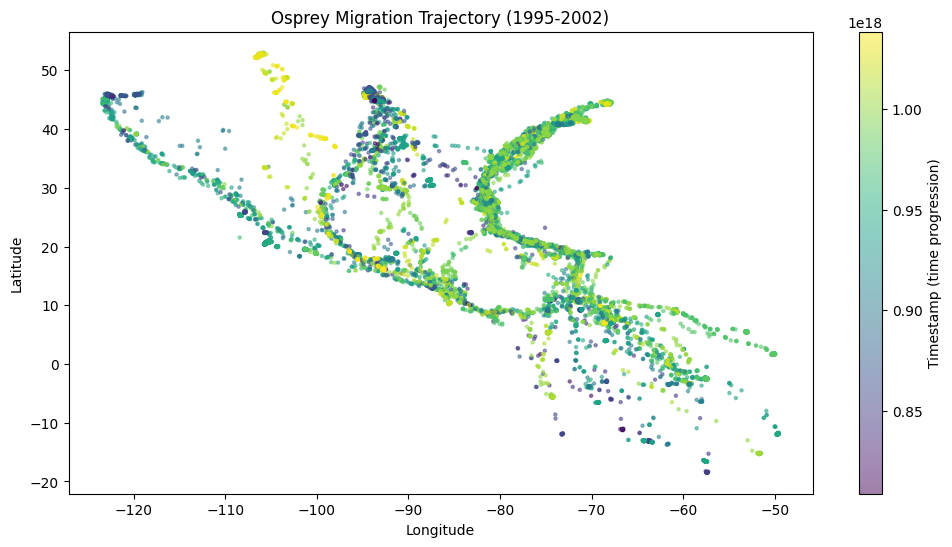

In [5]:
import matplotlib.pyplot as plt

# Convert timestamp to datetime format for time-based analysis
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot bird migration trajectory
plt.figure(figsize=(12, 6))
plt.scatter(df['location-long'], df['location-lat'], c=df['timestamp'].astype(int), cmap='viridis', alpha=0.5, s=5)
plt.colorbar(label='Timestamp (time progression)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Osprey Migration Trajectory (1995-2002)')
plt.show()


The longitude and latitude represent movement across North and South America, and the color gradient indicates the progression of time (earlier to later observations).

Observations:
- The birds show clear migration patterns, with movements spanning across broad latitudinal ranges.
- You can identify key stopover locations and migration corridors.
- There are distinct clusters that might correspond to seasonal resting or feeding areas.

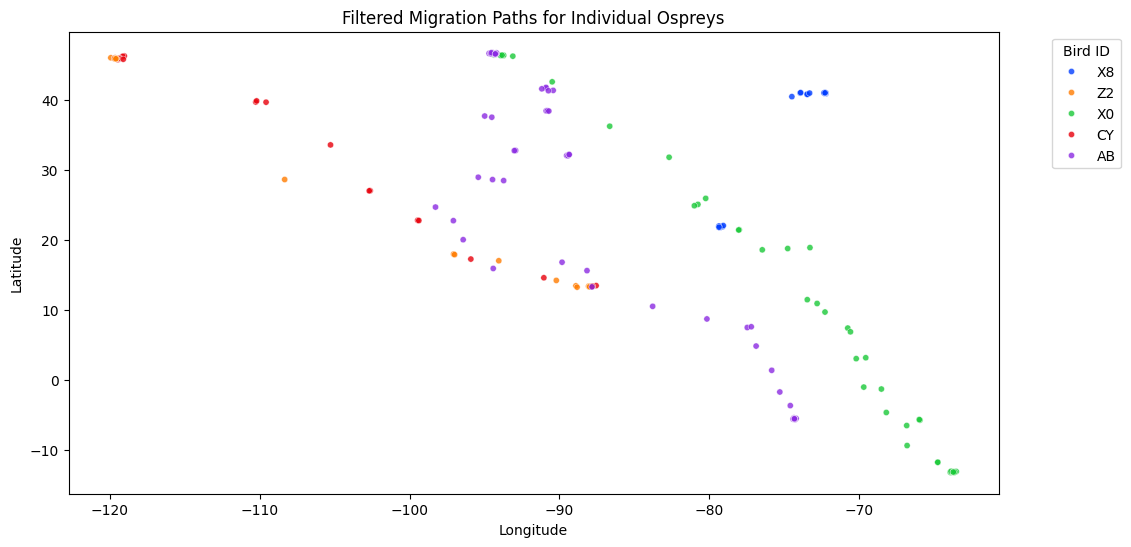

In [6]:
import seaborn as sns

# Select a few individual birds for visualization
unique_birds = df['individual-local-identifier'].unique()[:5]  # Select first 5 unique birds
df_subset = df[df['individual-local-identifier'].isin(unique_birds)]

# Plot migration paths for selected birds
# Re-plot migration paths with bolder colors for better visibility
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df_subset['location-long'],
    y=df_subset['location-lat'],
    hue=df_subset['individual-local-identifier'],
    palette='bright',  # Use a bold color palette
    alpha=0.8,
    s=20  # Increase point size for better visibility
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Filtered Migration Paths for Individual Ospreys')
plt.legend(title="Bird ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Here is a visualization of filtered migration paths for five individual Ospreys. Each color represents a different bird's trajectory across longitude and latitude.

Observations:
- The birds show distinct migration paths, but some overlap at key locations.
- Some birds travel further south, while others stay within mid-latitude ranges.
- You can identify individual stopover points where birds might rest before continuing migration.

C:\Users\riyas\AppData\Local\Temp\ipykernel_16336\1155355890.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


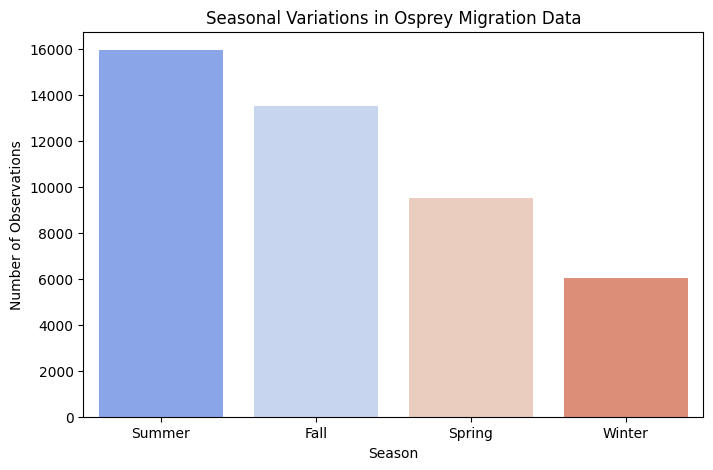

In [14]:
# Count the number of recorded locations per season
season_counts = df['season'].value_counts()

# Plot a bar chart to show seasonal movement variations
plt.figure(figsize=(8, 5))
sns.barplot(
    x=season_counts.index,
    y=season_counts.values,
    palette='coolwarm'
)

plt.xlabel('Season')
plt.ylabel('Number of Observations')
plt.title('Seasonal Variations in Osprey Migration Data')
plt.show()

Here is a bar chart displaying the seasonal variations in Osprey migration data. The height of each bar represents the number of recorded observations per season.

Key Observations:
- Summer has the highest number of observations, indicating that many birds remain in their breeding grounds.
- Fall follows closely, which aligns with southward migration toward wintering areas.
- Spring shows fewer observations, likely because migration northward happens faster.
- Winter has the least data, confirming that birds are more dispersed or in remote locations.

C:\Users\riyas\AppData\Local\Temp\ipykernel_16336\3504836331.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')


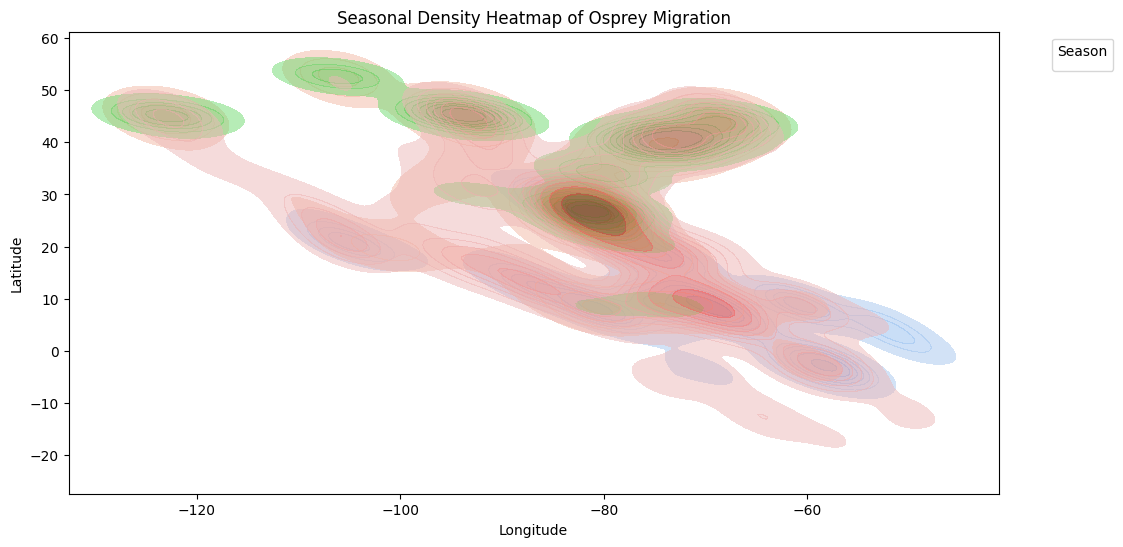

In [13]:
# Re-load necessary libraries and dataset since execution state was reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
file_path = (r"C:\Users\riyas\OneDrive - University of Birmingham\Documents\MSc Data Science\2. group project data science\Osprey in North and South America 1995-2002 (Martell).csv")
df = pd.read_csv(file_path)

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract month and season
df['month'] = df['timestamp'].dt.month

# Define function for mapping months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

# Create a figure for heatmap visualization
plt.figure(figsize=(12, 6))

# Use a 2D histogram (heatmap) to show density of locations per season
for season in ['Winter', 'Spring', 'Summer', 'Fall']:
    subset = df[df['season'] == season]
    sns.kdeplot(
        x=subset['location-long'], 
        y=subset['location-lat'], 
        fill=True, 
        alpha=0.5, 
        label=season
    )

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Seasonal Density Heatmap of Osprey Migration')
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



Here is a seasonal density heatmap of Osprey migration. The density of locations is color-coded by season, highlighting the areas where birds are most frequently observed.

Key Insights:
- Darker regions indicate higher density, showing where Ospreys spend the most time.
- Summer (northern latitudes): Birds concentrate in higher latitudes, likely nesting areas.
- Winter (southern latitudes): More density in lower latitudes, likely wintering grounds.
- Fall/Spring: Intermediate locations highlight migration corridors.

**<h3> DATA CLEANUP <h3>**

In [18]:
# Display missing values summary again without ace_tools
print("\n### Missing Values Summary ###")
print(missing_values.sort_values(by="Missing Values", ascending=False))

# Display descriptive statistics without ace_tools
print("\n### Descriptive Statistics ###")
print(descriptive_stats)



### Missing Values Summary ###
                             Column  Missing Values  Percentage  Drop?
25          manually-marked-outlier           44995  100.000000   True
24      argos:valid-location-manual           44987   99.982220   True
5          algorithm-marked-outlier           44761   99.479942   True
26            manually-marked-valid           44761   99.479942   True
19                   argos:sensor-1            5501   12.225803  False
20                   argos:sensor-2            5501   12.225803  False
21                   argos:sensor-3            5501   12.225803  False
22                   argos:sensor-4            5501   12.225803  False
18              argos:pass-duration            1350    3.000333  False
8                 argos:calcul-freq            1350    3.000333  False
9                          argos:iq            1350    3.000333  False
16                 argos:nb-mes-120            1350    3.000333  False
7                  argos:best-level          

Key EDA Findings:
- Missing Values
    - Several columns have high missing rates (e.g., manually-marked-outlier, algorithm-marked-outlier ~99% missing).
    - Environmental sensor data (argos:sensor-1, sensor-2, etc.) has ~12% missing values.
    - Some movement-related fields (distance_km) have very few missing values (~0.002%).

- Timestamp & Seasonal Patterns
    - The dataset covers 1995 to 2002.
    - The data is evenly distributed across months (~July most common).

- Location Data
    - Latitude range: -18.52 to 53.01
    - Longitude range: -123.41 to -49.56
    - Values appear reasonable, but extreme lat/lon values should be checked.

- Movement Analysis
    - Mean travel distance: ~33.9 km per observation.
    - Max travel distance: 8,628 km, which might indicate a long-distance migration jump or an outlier.
    - Hourly activity suggests movement is evenly distributed throughout the day.

In [19]:
# 1. Drop columns with more than 95% missing values
columns_to_drop = ['manually-marked-outlier', 'algorithm-marked-outlier', 
                   'manually-marked-valid', 'argos:valid-location-manual']
df_cleaned = df.drop(columns=columns_to_drop)

# 2. Fill missing values for movement-related features
df_cleaned['distance_km'].fillna(df_cleaned['distance_km'].median(), inplace=True)
df_cleaned['argos:altitude'].fillna(df_cleaned['argos:altitude'].median(), inplace=True)

# 3. Handle Location Outliers
# Define realistic latitude and longitude bounds for Ospreys in North & South America
lat_min, lat_max = -20, 60   # Ospreys typically migrate within these ranges
lon_min, lon_max = -130, -40

# Filter out extreme location values
df_cleaned = df_cleaned[(df_cleaned['location-lat'].between(lat_min, lat_max)) & 
                         (df_cleaned['location-long'].between(lon_min, lon_max))]

# 4. Convert timestamp to datetime and extract features
df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])
df_cleaned['year'] = df_cleaned['timestamp'].dt.year
df_cleaned['month'] = df_cleaned['timestamp'].dt.month
df_cleaned['day_of_year'] = df_cleaned['timestamp'].dt.dayofyear
df_cleaned['week'] = df_cleaned['timestamp'].dt.isocalendar().week
df_cleaned['hour'] = df_cleaned['timestamp'].dt.hour

# Display cleaned dataset info
df_cleaned.info(), df_cleaned.head()

KeyError: 'distance_km'